In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data_all.csv')
df.index = df['time']
df.drop('time', axis=1, inplace=True)
df.drop('freq', axis=1, inplace=True)
df.drop('state_gen', axis=1, inplace=True)
df.index = pd.to_datetime(df.index, unit='s')
df = df.sort_index()
df = df[df['state_dem'] > 5000]

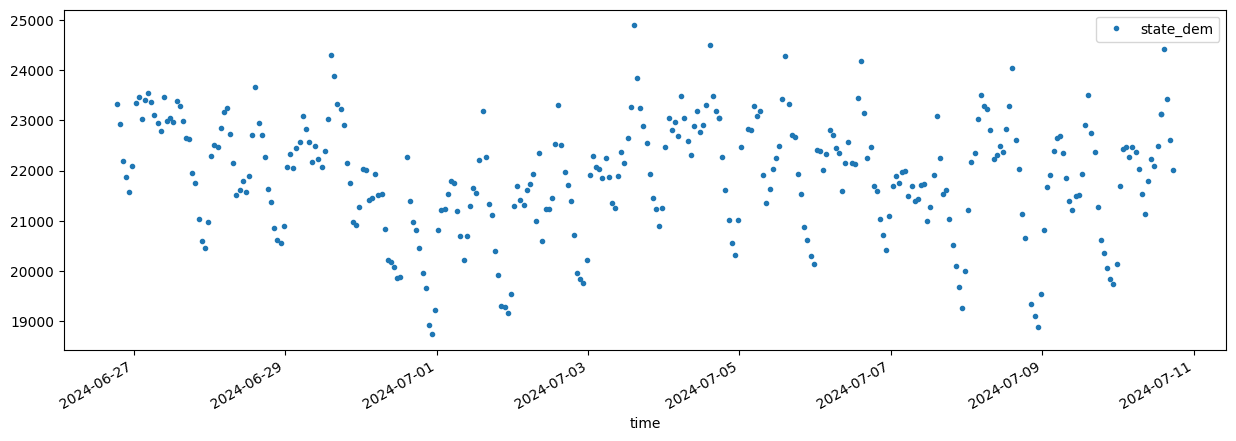

In [6]:
df.plot(style=".", figsize= (15,5))
plt.show()

In [7]:
df.tail()

,state_dem
time,
2024-07-10 13:32:39.453999996,23122
2024-07-10 14:32:17.421999931,24426
2024-07-10 15:32:12.779999971,23429
2024-07-10 16:32:12.836999893,22601
2024-07-10 17:32:16.601999998,22012


In [8]:
df.head()

,state_dem
time,
2024-06-26 18:32:02.973000050,23330
2024-06-26 19:32:13.609999895,22918
2024-06-26 20:32:05.009999990,22185
2024-06-26 21:32:06.263999939,21880
2024-06-26 22:32:06.497999907,21578


In [9]:
train = df.loc[df.index < '2024-07-10']
test = df.loc[df.index >= '2024-07-10']

<Axes: xlabel='time'>

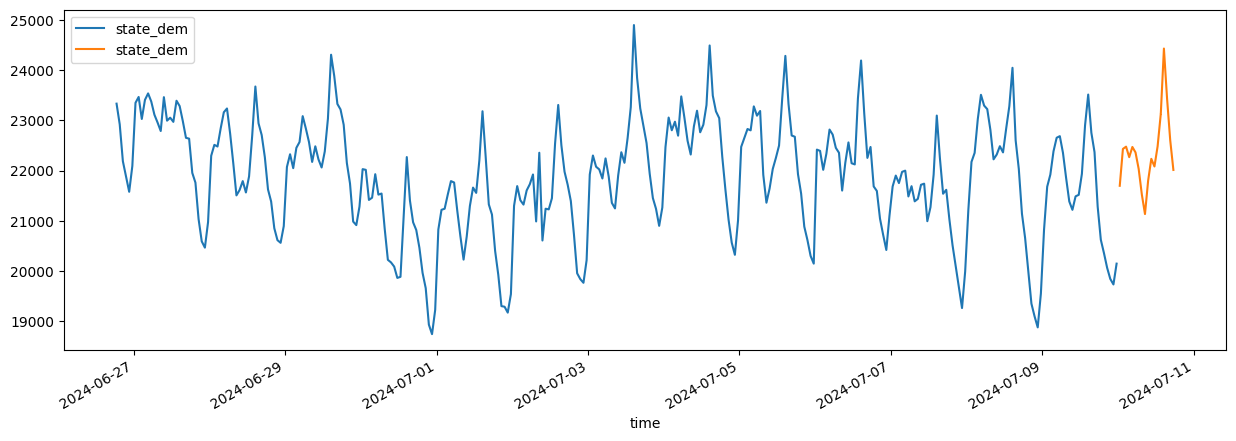

In [10]:
fig, ax = plt.subplots(figsize= (15,5))
train.plot(ax=ax)
test.plot(ax=ax)

In [11]:
def createFeatures(df):

    df['hour'] = df.index.hour
    df['weekDay'] = df.index.weekday
    df['month'] = df.index.month
    return df

df = createFeatures(df)


<Axes: xlabel='hour', ylabel='state_dem'>

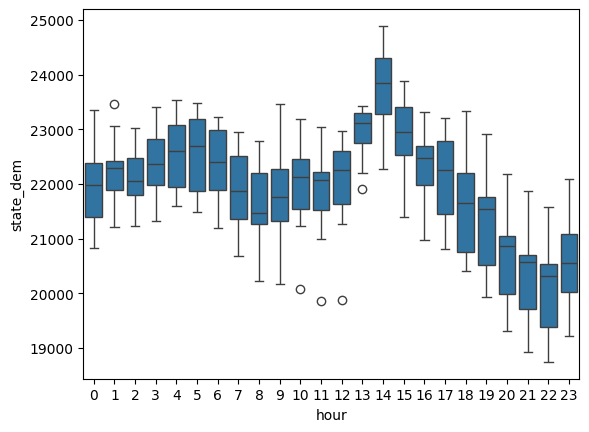

In [12]:
sns.boxplot(data=df, x='hour', y='state_dem')

<Axes: xlabel='weekDay', ylabel='state_dem'>

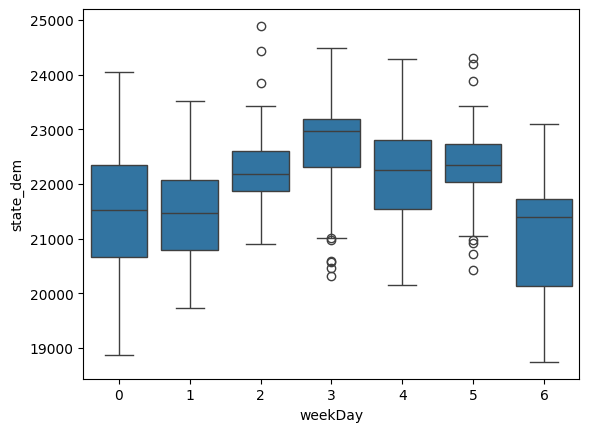

In [13]:
sns.boxplot(data=df, x='weekDay', y='state_dem')

<Axes: xlabel='month', ylabel='state_dem'>

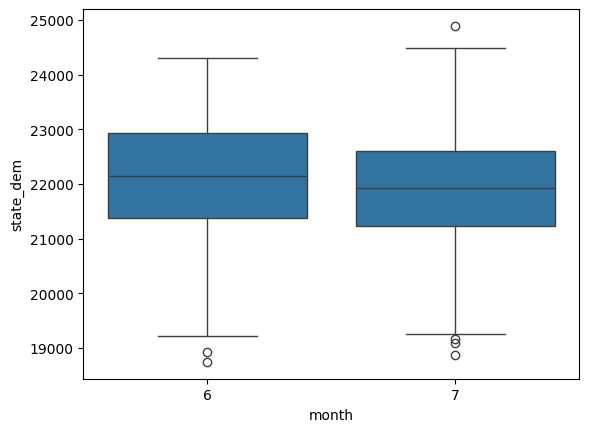

In [14]:
sns.boxplot(data=df, x='month', y='state_dem')

In [15]:
df.columns

Index(['state_dem', 'hour', 'weekDay', 'month'], dtype='object')

In [16]:
COLUMNS = ['hour', 'weekDay', 'month']
TARGET = 'state_dem'

In [17]:
train = createFeatures(train)
test = createFeatures(test)

In [18]:
X_train = train[COLUMNS]
y_train = train[TARGET]

X_test = test[COLUMNS]
y_test = test[TARGET]

In [19]:
import xgboost as xgb

In [20]:
reg = xgb.XGBRegressor(n_estimator=1000, early_stopping_rounds = 50,
                       learning_rate = 0.01)

reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose = 100)

[0]	validation_0-rmse:1128.75326	validation_1-rmse:888.21088
[99]	validation_0-rmse:602.38335	validation_1-rmse:513.13010


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=1000, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

<Axes: >

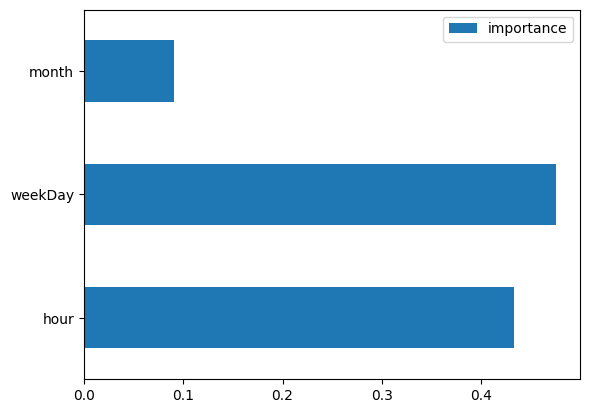

In [24]:
pd.DataFrame(reg.feature_importances_, index=reg.feature_names_in_, columns=['importance']).plot(kind='barh')

In [25]:
test['prediction'] = reg.predict(X_test)

In [26]:
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

<Axes: xlabel='time'>

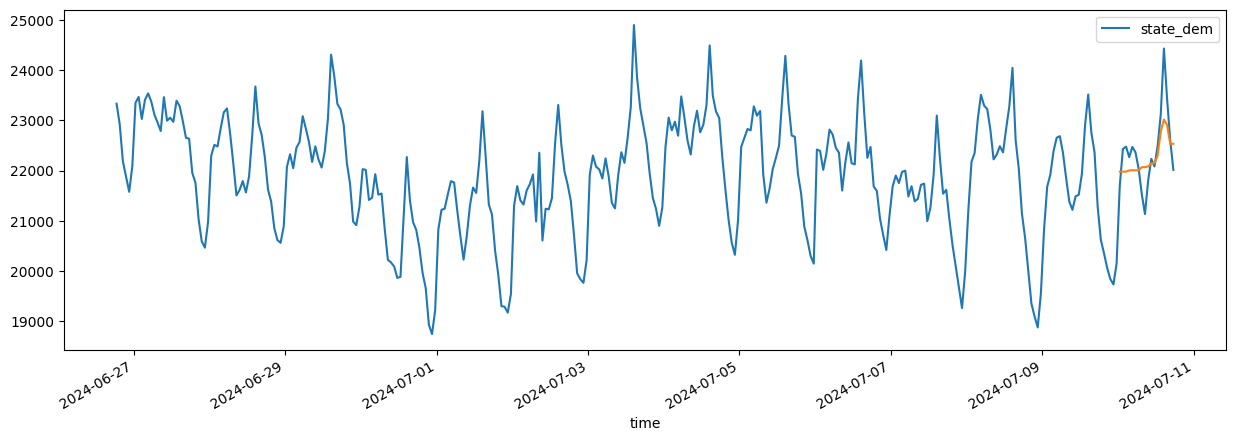

In [33]:
ax = df[['state_dem']].plot(figsize=(15,5))
df['prediction'].plot()